# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

images_normalized = False
training_set_balanced = False

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
import pandas as pd

<a id='basic-summary-1'></a>

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = np.size(train.get('labels'))

# TODO: Number of testing examples.
n_test = np.size(test.get('labels'))

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'].shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(train.get('labels')).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

signnames = pd.read_csv('./signnames.csv')
signnames.SignName.sample(n=5)

27              Pedestrians
23            Slippery road
15              No vehicles
31    Wild animals crossing
34          Turn left ahead
Name: SignName, dtype: object

In [6]:
# backup original images for displaying
X_train_org = np.copy(X_train)
y_train_org = np.copy(y_train)
y_train_pd = pd.DataFrame(y_train, columns=['index'])

y_train_group = y_train_pd.groupby('index')
y_train_group.groups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])

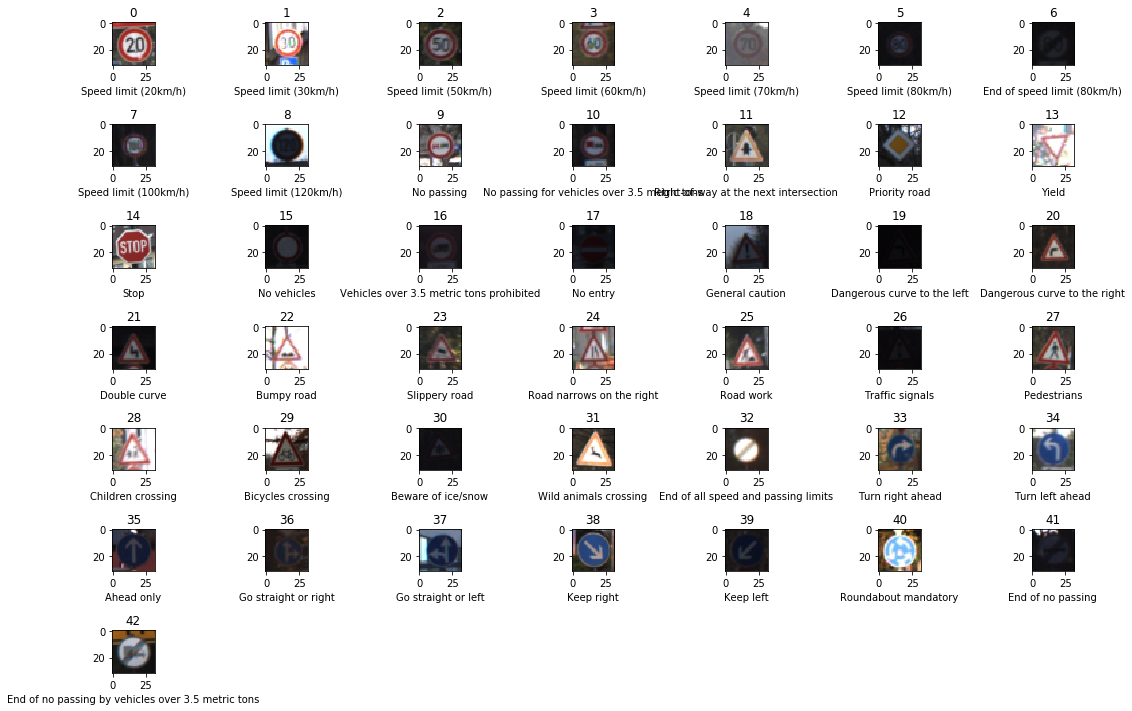

In [8]:
plt.figure(figsize=(15,10))
for i in range(1,n_classes+1):
    # get random image from train set
    index = y_train_group.groups.get(i-1)[np.random.randint(0, len(y_train_group.groups.get(i-1)))]
    image = X_train_org[index].squeeze()
    # get label for image from signnames
    label = "{}".format(y_train[index])
    # create subplot
    plt.subplot(7, 7, i)
    plt.title(label)
    plt.xlabel(signnames.SignName[y_train[index]])
    plt.imshow(image)
    
plt.tight_layout()
plt.savefig('./images/signs_overview.png', bbox_inches='tight')
del index, image, label

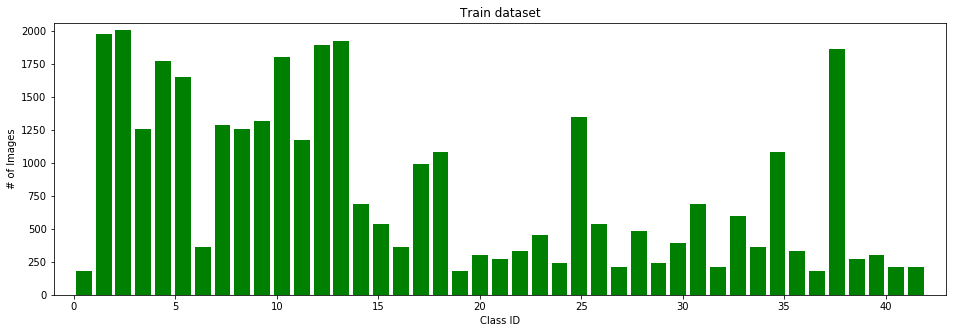

In [9]:
# Count of Images per Type in Train set
fig = plt.figure(figsize=(16,5))
plt.axis([-1, 43, 0, np.max(np.bincount(y_train)) + 50])
plt.hist(y_train, n_classes, color='green', rwidth=0.8)
plt.title('Train dataset')
plt.xlabel('Class ID')
plt.ylabel('# of Images')

plt.savefig('./images/distribution.png', bbox_inches='tight')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [10]:
# Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import cv2

In [11]:
def random_rotation(image, α):
    image_center = tuple(np.array(image.shape[:2])/2)
    rotation_matrix = cv2.getRotationMatrix2D(image_center, α, 1.0)
    retVal = cv2.warpAffine(image, rotation_matrix, tuple(image.shape[:2]), flags=cv2.INTER_LINEAR)
    
    del image_center, rotation_matrix
    return retVal

In [12]:
def gaussian_blur(image, kernel):
    retVal = cv2.GaussianBlur(image, (kernel, kernel), 0)
    return retVal

In [13]:
def equalize_Histogram_Y(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    return cv2.cvtColor(image, cv2.COLOR_YUV2BGR)

In [14]:
def random_translation(image, threshold):
    randX, randY = np.random.uniform(-threshold, threshold, 2)
    
    translation_matrix = np.float32([[1,0,randX], [0,1,randY]])
    retVal = cv2.warpAffine(image, translation_matrix, tuple(image.shape[:2]))
    
    del randX, randY, translation_matrix
    return retVal

(32, 32, 3)


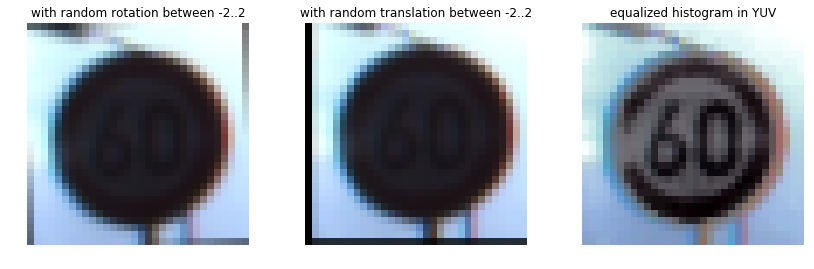

In [15]:
image = X_train_org[np.random.randint(len(X_train_org))]
aug_image1 = random_rotation(image, 2)
aug_image2 = random_translation(image, 2)
aug_image3 = equalize_Histogram_Y(image)
print(image.shape)
plt.figure(figsize=(15,6))
plt.subplot(1,4,2)
plt.title('original image')
plt.imshow(image)
plt.axis('off')
plt.subplot(1,4,2)
plt.title('with random rotation between -2..2')
plt.imshow(aug_image1)
plt.axis('off')
plt.subplot(1,4,3)
plt.title('with random translation between -2..2')
plt.imshow(aug_image2)
plt.axis('off')
plt.subplot(1,4,4)
plt.title('equalized histogram in YUV')
plt.imshow(aug_image3)
plt.axis('off')
plt.tight_layout()
plt.savefig('./images/image_augmentation.png', bbox_inches='tight')

In [16]:
def augment_image(image, α=1, x=1, k=3):
    rnd_op = np.random.randint(0,3)
    
    if rnd_op == 0 or rnd_op == 3:
        image = random_rotation(image, α)
    if rnd_op == 1 or rnd_op == 3:
        image = random_translation(image, x)
    if rnd_op == 2 or rnd_op == 3:
        image = equalize_Histogram_Y(image)
    #if rnd_op == 2 or rnd_op == 3:
        #image = gaussian_blur(image, k)
        
    del rnd_op
    return image

In [17]:
X_aug_all = list()
y_aug_all = list()
if not training_set_balanced:
    kernel_sizes = [3, 5, 7, 9]
    images_per_class = np.bincount(y_train)
    max_image_count = np.max(images_per_class)
    for classId in range(n_classes):
        X_aug = list()
        y_aug = list()
        X_source = X_train[np.where(y_train == classId)]
        new_image_count = max_image_count - images_per_class[classId] + np.random.randint(-50, 50)
        if new_image_count < 1:
            continue
        for i in range(new_image_count):
            α = 2
            thrsld = 2
            randSourceIdx = np.random.randint(images_per_class[classId])
            X_aug.append(augment_image(X_source[randSourceIdx], α, thrsld))
            y_aug.append(classId)
        
        X_aug_all += X_aug
        y_aug_all += y_aug
        X_train = np.append(X_train, X_aug, axis=0)
        y_train = np.append(y_train, y_aug, axis=0)
        
    del X_aug, y_aug, kernel_sizes, images_per_class, max_image_count, new_image_count
    training_set_balanced = True
    
n_train = np.size(y_train)
print("Number of training examples =", n_train)
assert(len(X_train) == len(y_train))

Number of training examples = 85980


In [18]:
mean_X_train = np.mean(X_train)
mean_X_train_org = np.mean(X_train_org)
mean_X_test = np.mean(X_test)

In [19]:
print("Added ", len(X_aug_all), " augmented images")
print("Mean over X_train: ", mean_X_train, "\nMean over X_train_org: ", mean_X_train_org,\
      "\nMean over X_test: ", mean_X_test)

Added  51181  augmented images
Mean over X_train:  91.9162227877 
Mean over X_train_org:  82.677589037 
Mean over X_test:  82.1484603612


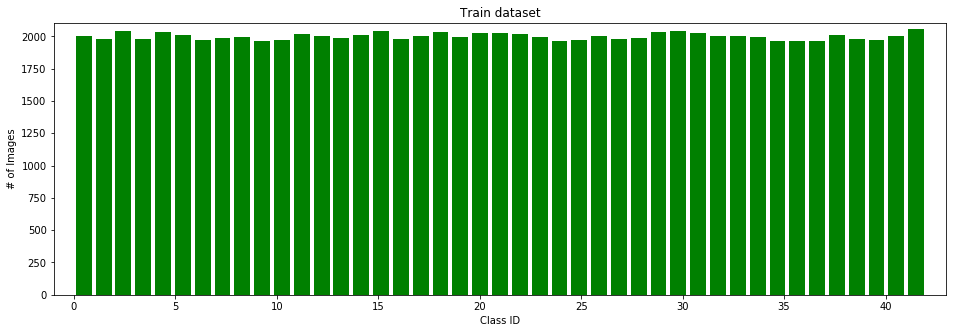

In [20]:
# balanced training set
# Count of Images per Type in Train set
fig = plt.figure(figsize=(16,5))
plt.axis([-1, 43, 0, np.max(np.bincount(y_train)) + 50])
plt.hist(y_train, n_classes, color='green', rwidth=0.8)
plt.title('Train dataset')
plt.xlabel('Class ID')
plt.ylabel('# of Images')
plt.savefig('./images/distribution_augmented.png', bbox_inches='tight')

In [21]:
def convert_to_grayscale(image):
    return np.sum(image/3, axis=2, keepdims=True)

In [22]:
# Normalize the image data with Min-Max scaling to a range of [-1.0, 1.0]
def normalize_grayscale(image, a= -1.0, b= 1.0):
    return a + (image * (b-a) / 255.0)

In [23]:
def equalize_Histogram(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(image)
    return cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

In [24]:
def normalize_image(image, equalize=False):
    if equalize:
        image = equalize_Histogram(image)
    image = convert_to_grayscale(image)
    image = normalize_grayscale(image)
    return image

### Normalization

In [25]:
if not images_normalized:
    X_train = list(map(lambda img: normalize_image(img, True), X_train))
    X_test = list(map(lambda img: normalize_image(img, True), X_test))
    X_valid = list(map(lambda img: normalize_image(img, True), X_valid))
    
    images_normalized = True

In [26]:
mean_train_norm = np.mean(X_train)
mean_test_norm = np.mean(X_test)
print("Mean over normalized X_train: ", mean_train_norm, "\nMean over normalized X_test: ", mean_test_norm)

Mean over normalized X_train:  0.0194362525955 
Mean over normalized X_test:  0.0334324999175


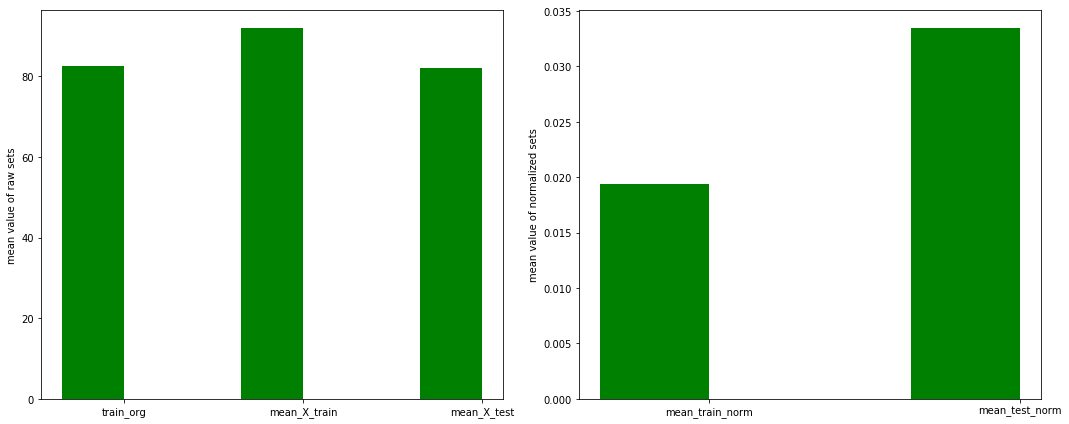

In [27]:
# original sets
mean_values = (mean_X_train_org, mean_X_train, mean_X_test)
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ind = np.arange(len(mean_values))
width=0.35
rects1 = ax[0].bar(ind, mean_values, width=width, color='green')
ax[0].set_ylabel('mean value of raw sets')
ax[0].set_xticks(ind+width/2)
ax[0].set_xticklabels(('train_org', 'mean_X_train', 'mean_X_test'))
# normalized sets
mean_values = (mean_train_norm, mean_test_norm)
ind = np.arange(len(mean_values))
width=0.35
rects1 = ax[1].bar(ind, mean_values, width=width, color='green')
ax[1].set_ylabel('mean value of normalized sets')
ax[1].set_xticks(ind+width/2)
ax[1].set_xticklabels(('mean_train_norm', 'mean_test_norm'))
fig.tight_layout()
plt.savefig('./images/mean_of_sets.png', bbox_inches='tight')

Comparing augmented images on the left hand with random original images


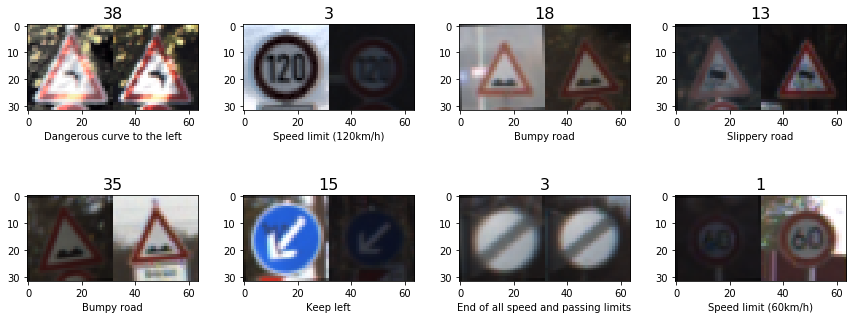

In [28]:
plt.figure(figsize=(12,5))
for i in range(1,9):
    # get random image from train set
    index = np.random.randint(len(X_aug_all))
    image = X_aug_all[index].squeeze()
    org_images_same_class = y_train_group.groups.get(y_aug_all[index])
    org_image_idx = org_images_same_class[np.random.randint(len(org_images_same_class))]
    image = np.hstack((image.squeeze(), X_train_org[org_image_idx].squeeze()))
    # create subplot
    plt.subplot(2,4,i)
    plt.title(y_train[index],fontsize=16)
    plt.xlabel(signnames.SignName[y_aug_all[index]])
    plt.imshow(image)
    
plt.tight_layout()
plt.savefig('./images/augmented_original_compared.png', bbox_inches='tight')
print("Comparing augmented images on the left hand with random original images")
del index, image, org_images_same_class, org_image_idx

Comparing normalized images on the left hand with random original images


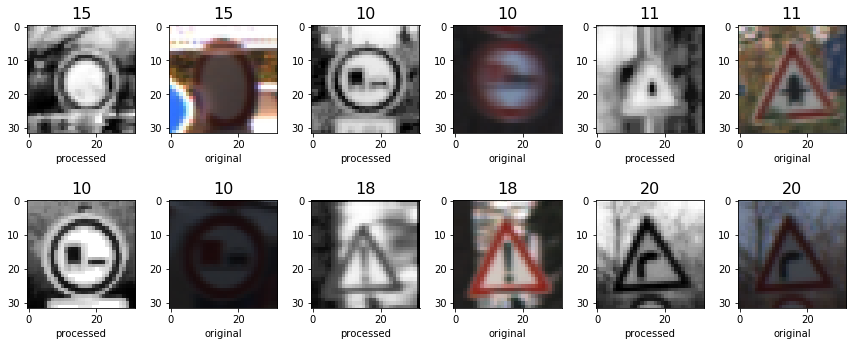

In [29]:
plt.figure(figsize=(12,5))
for i in range(1, 12, 2):
    # get random image from train set
    index = np.random.randint(len(X_aug_all))
    image = X_train[index]
    org_images_same_class = y_train_group.groups.get(y_train[index])
    org_image_idx = org_images_same_class[np.random.randint(len(org_images_same_class))]
    org_image = X_train_org[org_image_idx]
    #image = np.hstack((image.squeeze(), org_image.squeeze()))
    # create subplot
    plt.subplot(2,6,i)
    plt.title(y_train[index],fontsize=16)
    plt.xlabel('processed')
    plt.imshow(image.squeeze(), cmap='gray')
    plt.subplot(2,6,i+1)
    plt.title(y_train[index],fontsize=16)
    plt.xlabel('original')
    plt.imshow(org_image.squeeze())
    
plt.tight_layout()
plt.savefig('./images/augmented_normalized_original.png', bbox_inches='tight')
print("Comparing normalized images on the left hand with random original images")
del index, image, org_images_same_class, org_image_idx

In [30]:
# shuffle training data
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)

In [31]:
image_shape = X_train[0].shape
print(image_shape)

(32, 32, 1)


### Model Architecture

In [32]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten as tfFlatten

In [33]:
tf.reset_default_graph()

In [34]:
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

weights = {
    'conv1_W': tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 100), mean=mu, stddev=sigma)),
    'conv2_W': tf.Variable(tf.truncated_normal(shape=(4, 4, 100, 150), mean=mu, stddev=sigma)),
    'conv3_W': tf.Variable(tf.truncated_normal(shape=(4, 4, 150, 250), mean=mu, stddev=sigma)),
    'fc1_W': tf.Variable(tf.truncated_normal(shape=(9000, 200), mean=mu, stddev=sigma)),
    'fc2_W': tf.Variable(tf.truncated_normal(shape=(200, 43), mean=mu, stddev=sigma)),
    'fc3_W': tf.Variable(tf.truncated_normal(shape=(43, 43), mean=mu, stddev=sigma)) 
}

biases = {
    'conv1_b': tf.Variable(tf.zeros(100)),
    'conv2_b': tf.Variable(tf.zeros(150)),
    'conv3_b': tf.Variable(tf.zeros(250)),
    'fc1_b': tf.Variable(tf.zeros(200)),
    'fc2_b': tf.Variable(tf.zeros(43)),
    'fc3_b': tf.Variable(tf.zeros(43))
}

In [35]:
def conv2d_maxpool(x_tensor, layer_name, padding, convStrides=[1,1,1,1], poolKernel=[1, 2, 2, 1],
                   poolStrides=[1, 2, 2, 1], debug=False):
    global LAYERS
    l_W = weights[layer_name + '_W']
    l_b = biases[layer_name + '_b']
    
    if debug: print(layer_name, ' weights:', l_W, ' x_tensor: ', x_tensor, ' padding: ', padding)
    
    # init convolutional layer
    layer = tf.nn.conv2d(x_tensor, l_W, convStrides, padding=padding) + l_b
    
    # adding layer for later
    LAYERS[layer_name] = layer
    
    # activating convolutional layer
    activated = tf.nn.relu(layer)
    
    # pooling layer
    pooled = tf.nn.max_pool(activated, poolKernel, poolStrides, padding=padding)

    return pooled

In [91]:
def fully_connected(x_tensor, layer_name, activate=True, dropout=True, debug=False):
    global LAYERS
    l_W = weights[layer_name + '_W']
    l_b = biases[layer_name + '_b']
    
    if debug: print(layer_name, ' weights:', l_W, ' x_tensor: ', x_tensor, ' activate: ', str(activate), \
                    ' dropout: ', str(dropout))
    
    # init fully connected layer
    retVal = tf.matmul(x_tensor, l_W) + l_b

    if activate:
        # adding activation
        retVal = tf.nn.relu(retVal)
        LAYERS[layer_name] = retVal
        if debug: print(layer_name, ' got activated')
    
    if dropout:
        # adding dropout
        retVal = tf.nn.dropout(retVal, keep_prob)
        if debug: print(layer_name, ' got dropout')
    
    return retVal

In [37]:
def StreetSignNet(x, debug=False):
    # Layer 1
    l1 = conv2d_maxpool(x, 'conv1', padding='VALID', debug=debug)
    if debug: print("layer 1: ", l1)

    # Layer 2
    l2 = conv2d_maxpool(l1, 'conv2', padding='VALID', debug=debug)
    if debug: print('layer 2: ', l2)
    
    # Layer 3
    l3 = conv2d_maxpool(l2, 'conv3', padding='SAME', poolKernel=[1, 1, 1, 1], poolStrides=[1, 1, 1, 1], debug=debug)
    if debug: print('layer 3: ', l3)
    
    # Layer 4 - flatten Layer 3
    l4 = tfFlatten(l3)
    if debug: print('layer 4: ', l4)
    
    # Layer 5
    l5 = fully_connected(l4, 'fc1', activate=True, dropout=True, debug=debug)
    if debug: print('layer 5: ', l5)

    # Layer 6
    l6 = fully_connected(l5, 'fc2', activate=True, dropout=True, debug=debug)
    if debug: print('layer 6: ', l6)
        
    # Layer 7
    logits = fully_connected(l6, 'fc3', activate=False, dropout=False, debug=debug)
    if debug: print('layer 7: ', logits)
    
    return logits

In [38]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [39]:
EPOCHS = 25
BATCH_SIZE = 128
LEARN_RATE = 0.001
LAYERS = dict()

In [92]:
logits = StreetSignNet(x, debug=True)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(LEARN_RATE)
training_operation = optimizer.minimize(loss_operation)

conv1  weights: Tensor("Variable/read:0", shape=(3, 3, 1, 100), dtype=float32)  x_tensor:  Tensor("Placeholder:0", shape=(?, 32, 32, 1), dtype=float32)  padding:  VALID
layer 1:  Tensor("MaxPool_3:0", shape=(?, 15, 15, 100), dtype=float32)
conv2  weights: Tensor("Variable_1/read:0", shape=(4, 4, 100, 150), dtype=float32)  x_tensor:  Tensor("MaxPool_3:0", shape=(?, 15, 15, 100), dtype=float32)  padding:  VALID
layer 2:  Tensor("MaxPool_4:0", shape=(?, 6, 6, 150), dtype=float32)
conv3  weights: Tensor("Variable_2/read:0", shape=(4, 4, 150, 250), dtype=float32)  x_tensor:  Tensor("MaxPool_4:0", shape=(?, 6, 6, 150), dtype=float32)  padding:  SAME
layer 3:  Tensor("MaxPool_5:0", shape=(?, 6, 6, 250), dtype=float32)
layer 4:  Tensor("Flatten_1/Reshape:0", shape=(?, 9000), dtype=float32)
fc1  weights: Tensor("Variable_3/read:0", shape=(9000, 200), dtype=float32)  x_tensor:  Tensor("Flatten_1/Reshape:0", shape=(?, 9000), dtype=float32)  activate:  True  dropout:  True
fc1  got activated
fc1  

In [41]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, 
                                                           y: batch_y,
                                                           keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [42]:
saver = tf.train.Saver()

In [93]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    if tf.train.latest_checkpoint('./') != None or len(saver.last_checkpoints) > 0:
        print('restore checkpoint')
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        EPOCHS = 5

    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, 
                                                    y: batch_y,
                                                    keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'sign_net')
    print("Model saved")

restore checkpoint
Training...

EPOCH 1 ...
Validation Accuracy = 0.988

EPOCH 2 ...
Validation Accuracy = 0.986

EPOCH 3 ...
Validation Accuracy = 0.988

EPOCH 4 ...
Validation Accuracy = 0.986

EPOCH 5 ...
Validation Accuracy = 0.985

Model saved


In [44]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.965


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [45]:
import os

### Load the images and plot them here.
images_with_labels = {}
labels = {}
X_new = list()
y_new = np.array([], dtype=np.int)
path_to_signs = './examples/signs'
for imagePath in os.listdir(path_to_signs):
    image = cv2.imread(os.path.join(path_to_signs, imagePath), cv2.IMREAD_UNCHANGED)
    path = imagePath.split('_')
    image = cv2.resize(image, (32, 32))
    images_with_labels[path[0]] = cv2.cvtColor(image, cv2.COLOR_BGRA2RGB)
    X_new.append(image)
    y_new = np.append(y_new, [np.int(path[0])])
    labels[path[0]] = path[1]
    
print("Loaded {} images".format(len(images_with_labels)))
new_images_normalized = False

Loaded 11 images


In [46]:
print(len(X_new), ' images of shape: ' , X_new[0].shape)

11  images of shape:  (32, 32, 4)


In [47]:
labels

{'12': 'PriorityRoad',
 '14': 'Stop',
 '15': 'NoVehicles',
 '17': 'NoEntry',
 '18': 'GeneralCaution',
 '25': 'RoadWork',
 '33': 'RightOnly',
 '35': 'AheadOnly',
 '44': 'Bikelane',
 '45': 'Loadingzone',
 '46': 'PedsBikes'}

In [48]:
if not new_images_normalized:
    X_new = list(map(lambda img: normalize_image(img), X_new))
    print('new images normalized')
    new_images_normalized=True

new images normalized


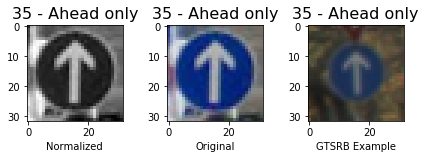

In [49]:
for i, image in enumerate(X_new):
    # get label for image from signnames
    classId = y_new[i]
    psbl_images = y_train_group.groups.get(classId)
    gtsrb_image = X_train_org[psbl_images[np.random.randint(len(psbl_images))]]
    org_image = images_with_labels.get(str(classId))
    signNme = signnames.SignName[classId] if classId < 44 else labels[str(classId)]
    label = "{} - {}".format(classId, signNme)
    # create subplot
    sub_plot = plt.subplot(1,3,1)
    sub_plot.set_title(label,fontsize=16)
    sub_plot.set_xlabel("Normalized")
    plt.imshow(image.squeeze(), cmap='gray')
    sub_plot = plt.subplot(1,3,2)
    sub_plot.set_title(label,fontsize=16)
    sub_plot.set_xlabel("Original")
    plt.imshow(org_image.squeeze())
    sub_plot = plt.subplot(1,3,3)
    sub_plot.set_title(label,fontsize=16)
    sub_plot.set_xlabel("GTSRB Example")
    plt.imshow(gtsrb_image.squeeze())
    break
    
plt.tight_layout()
plt.savefig('./images/normalized_new.png', bbox_inches='tight')

### Predict the Sign Type for Each Image

In [50]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_new, y_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.636


<a id='predictions_cell'></a>

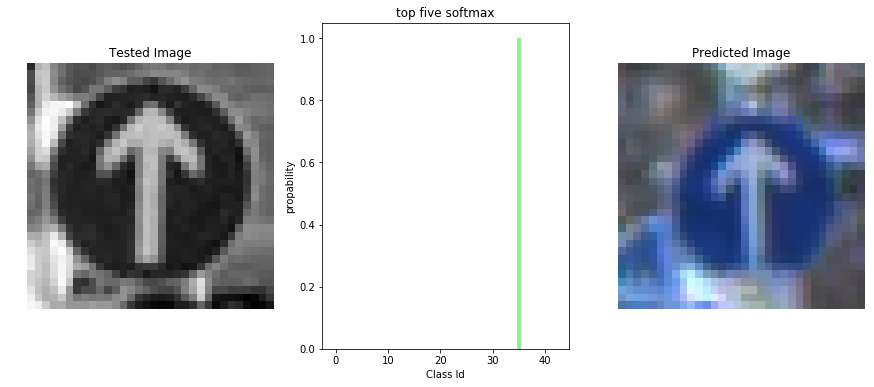

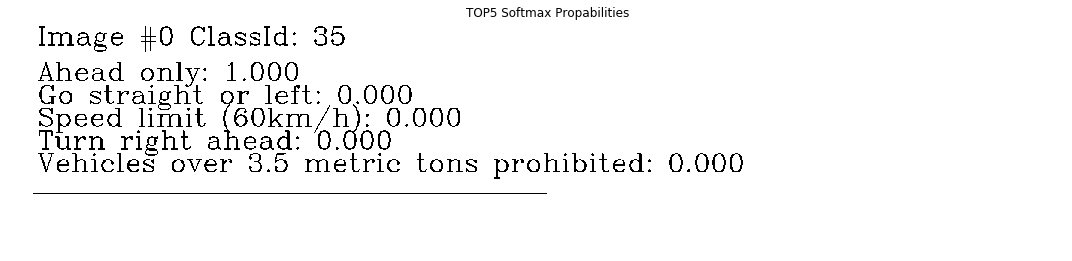

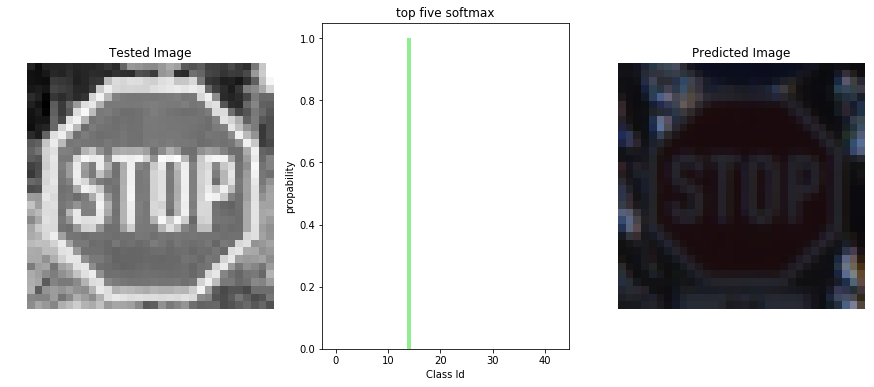

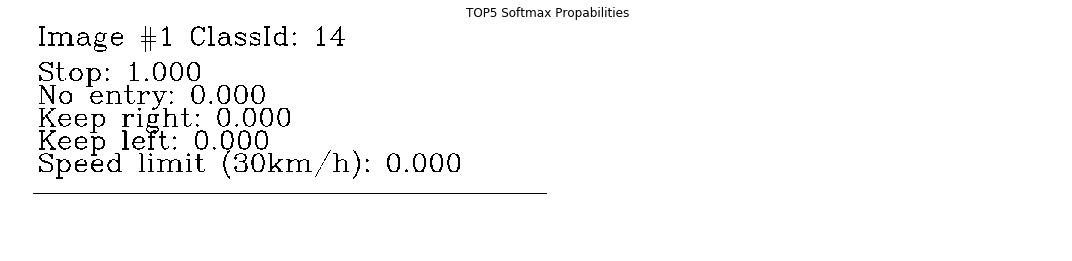

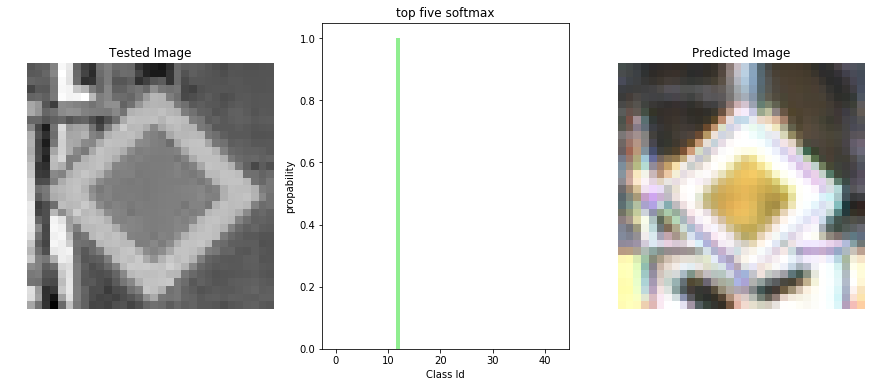

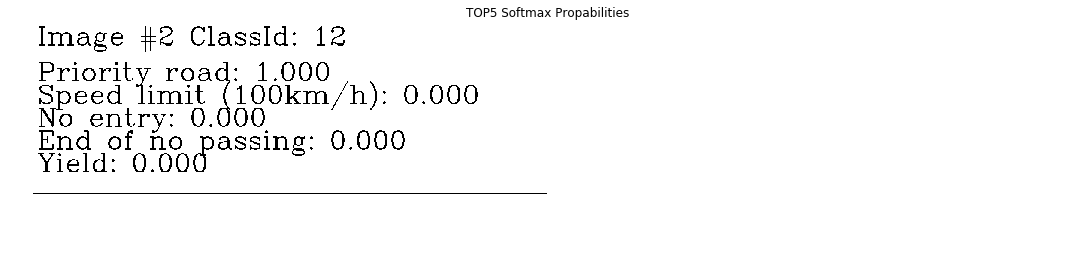

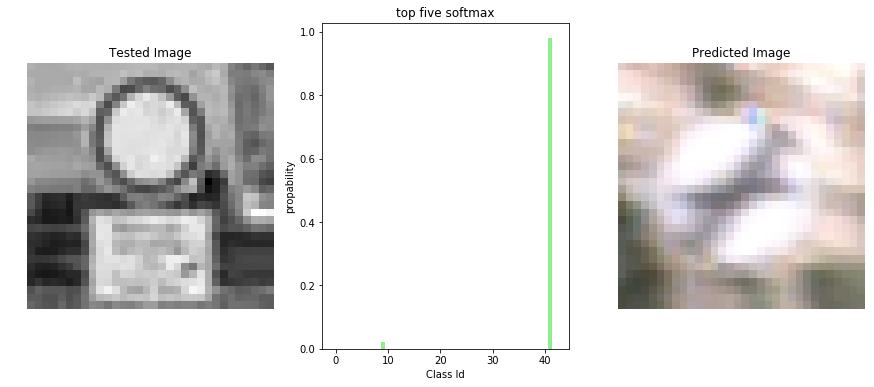

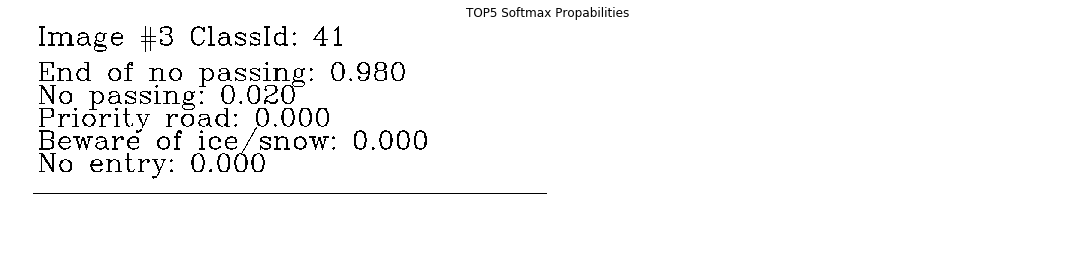

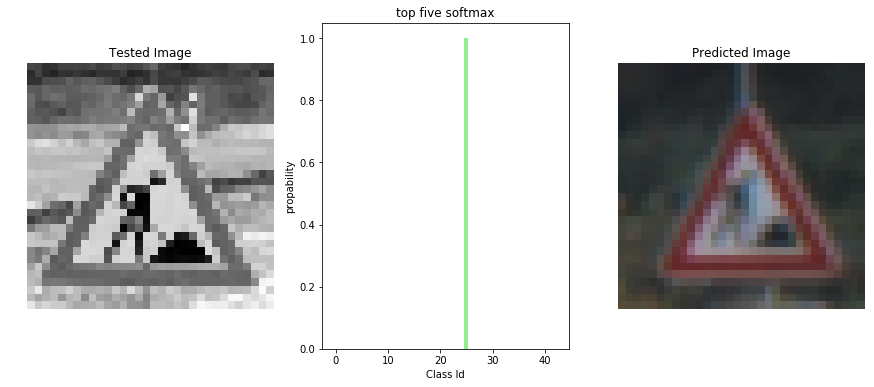

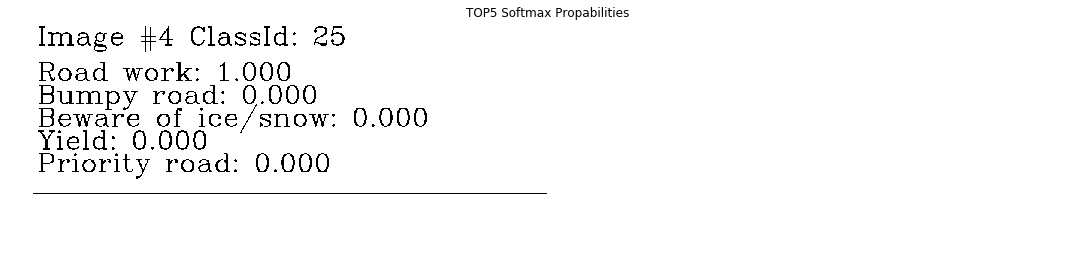

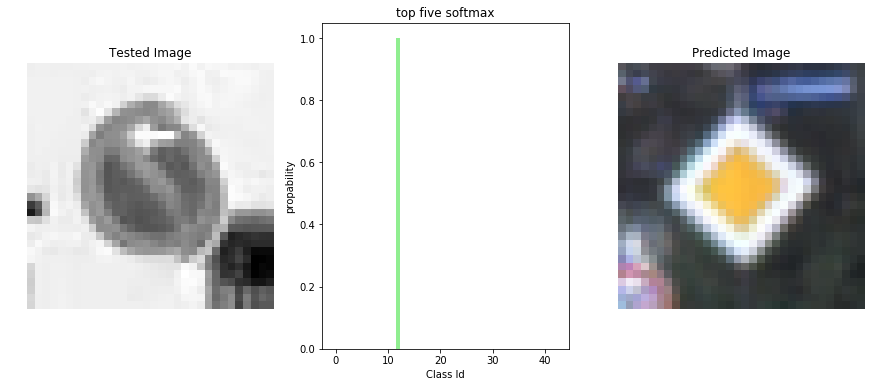

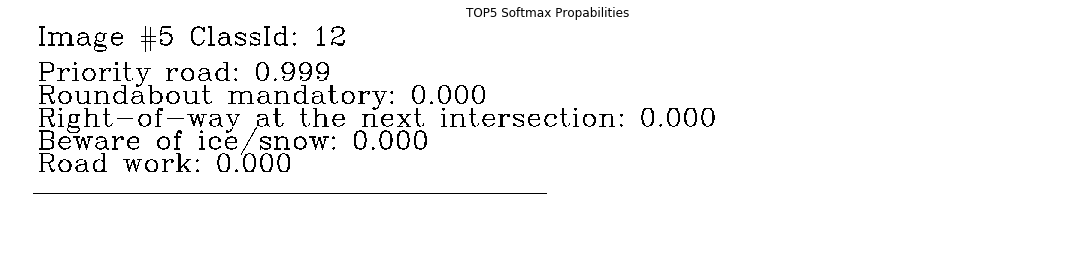

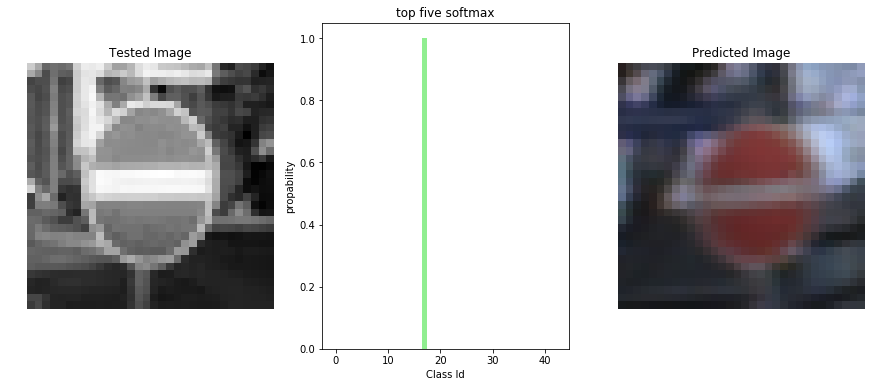

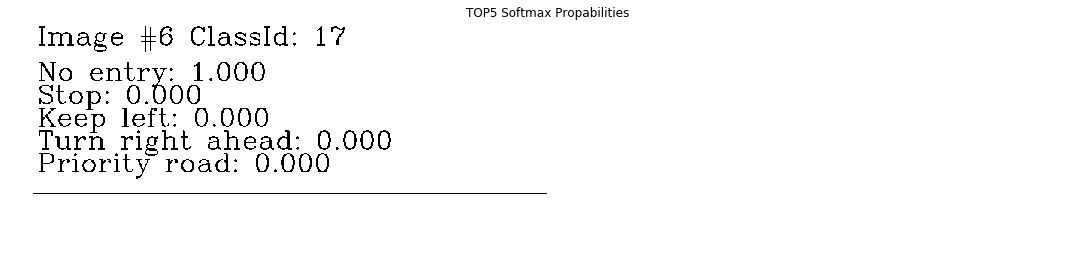

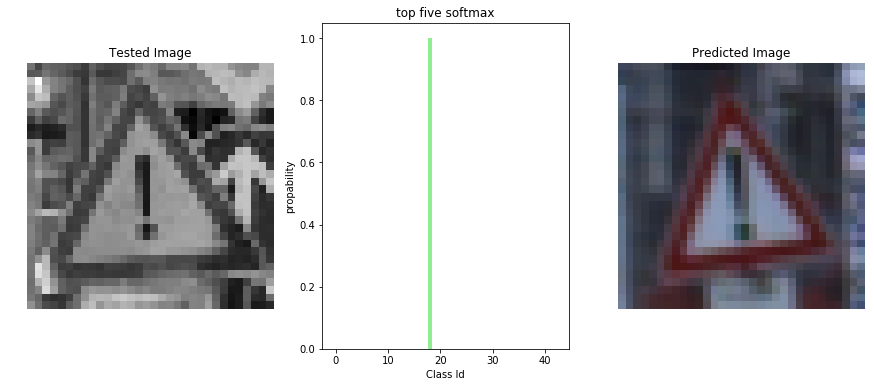

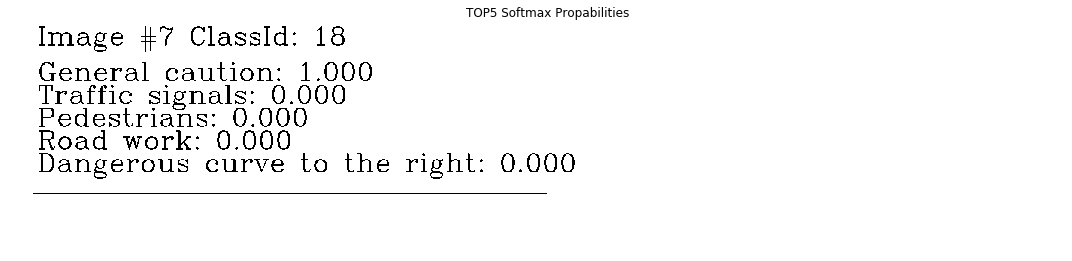

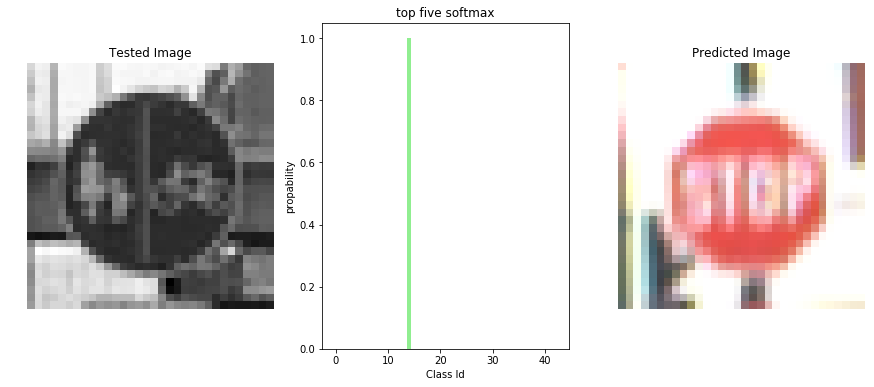

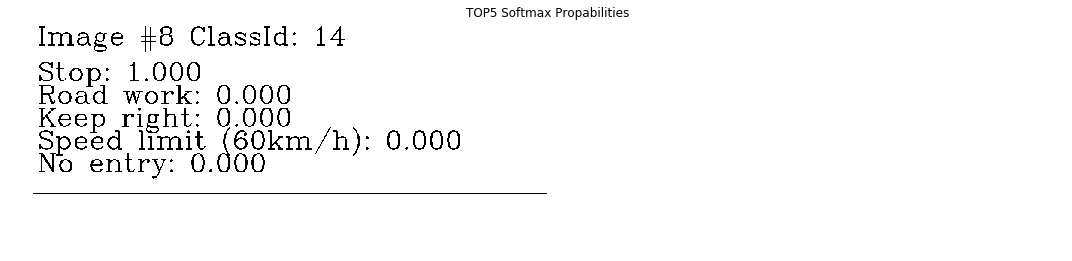

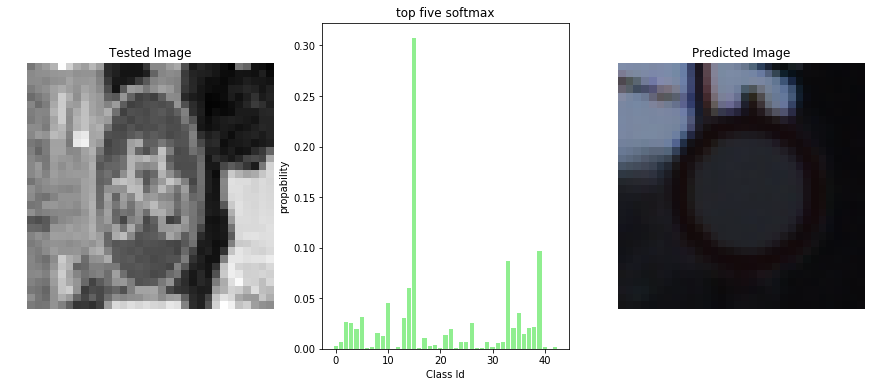

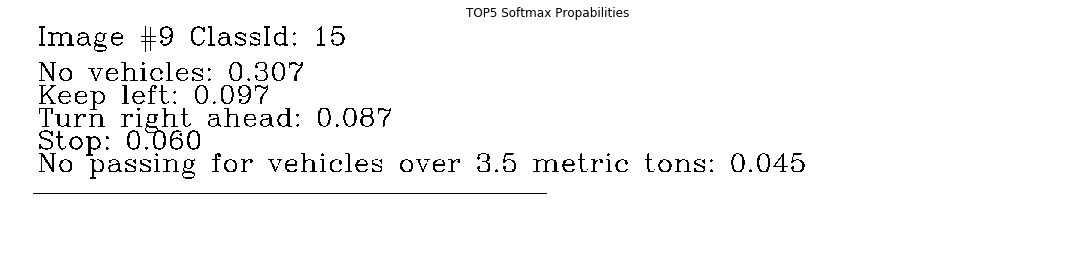

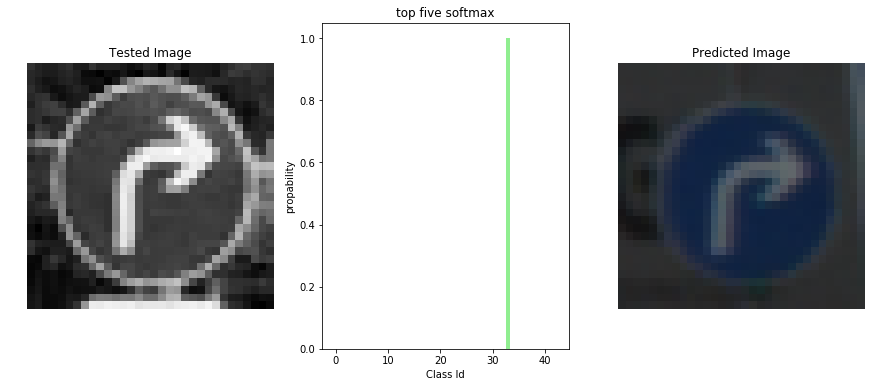

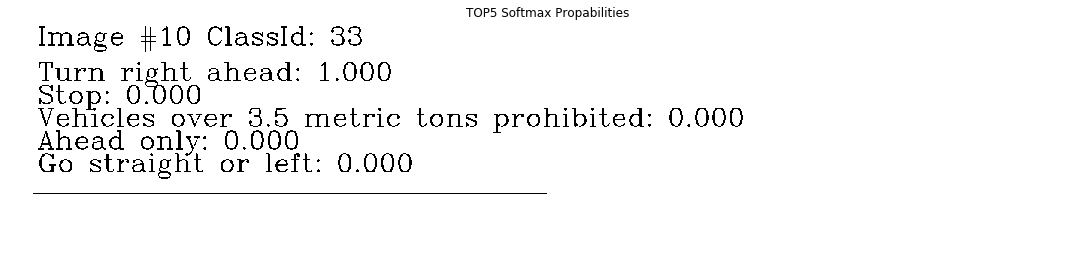

In [66]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
h_line = np.zeros((3,1024), np.uint8)
import sys

n_new_images = len(X_new)
n_correct = 0
top=5

softmax_for_later = dict()
topK_for_later = dict()

softmax = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    for img_idx, image in enumerate(X_new):
        fd = {x: [image], keep_prob: 1.}
        softmax_predictions = sess.run(softmax, feed_dict=fd)
        
        softmax_for_later[img_idx] = softmax_predictions
        
        top_k = tf.nn.top_k(softmax, top)
        topProbabilities, topClasses = sess.run(top_k, feed_dict=fd)
        
        topK_for_later[img_idx] = (topProbabilities, topClasses)
        
        predictedClass = topClasses[0][0]
        
        # get sign from new image set to display
        org_img = images_with_labels.get(str(y_new[img_idx]))

        # get predicted sign from training set if it's not in new set
        randomIndex = np.random.randint(0, n_classes)
        indexGroup = y_train_group.groups.get(predictedClass)
        predicted_img = X_train_org[indexGroup[randomIndex]]
        # if predicted sign in new signs load it from there
        if str(img_idx) in images_with_labels:
            predicted_img = images_with_labels.get(str(predictedClass)) 
         
        fig = plt.figure(figsize=(15,6))
        plt.subplot(1,3,1)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title('Tested Image')
        plt.axis('off')
        plt.subplot(1,3,2)
        plt.bar(left=signnames.ClassId, height=softmax_predictions[0], color='lightgreen')
        plt.xlabel('Class Id')
        plt.ylabel('propability')
        plt.title('top five softmax')
        plt.subplot(1,3,3)
        plt.imshow(predicted_img)
        plt.axis('off')
        plt.title('Predicted Image')
        plt.show()
        fig.tight_layout()
        plt.savefig('./images/predicted_{}.png'.format(img_idx), bbox_inches='tight')
        
        textImage = np.ones((500, 2400))
        fontFace = cv2.FONT_HERSHEY_COMPLEX
        fontScale = thickness = 2
        baseline = leftBorder = 10
        firstLine = "Image #{} ClassId: {}".format(img_idx, predictedClass)
        textSize = cv2.getTextSize(firstLine, fontFace, fontScale, thickness)
        baseline += textSize[0][1]
        textImage = cv2.putText(textImage, firstLine, (leftBorder, baseline), fontFace, fontScale, (0,0,0), 
                                thickness)
        baseline += 30
        for probability, classId in zip(topProbabilities[0], topClasses[0]):
            txt = "{}: {:.3f}".format(signnames.SignName[classId], probability)
            textSize = cv2.getTextSize(txt, fontFace, fontScale, thickness)
            baseline += textSize[0][1] + 10
            textImage = cv2.putText(textImage, txt, (leftBorder, baseline), fontFace, fontScale, (0,0,0), 
                                    thickness)
            
        textImage = cv2.line(textImage, (0, baseline+50), (int(2390/2), baseline+50), (0,0,0), 
                             thickness)
           
        plt.figure(figsize=(15,6))
        plt.title("TOP5 Softmax Propabilities")
        plt.axis('off')
        plt.imshow(textImage, cmap='gray')
        plt.tight_layout()
        plt.savefig('./images/predicted_text_{}.png'.format(img_idx), bbox_inches='tight')
        plt.show()
        
        # test image class
        testClass = y_new[img_idx]
        # if predictedClass == testClass it was a correct match
        n_correct += 1 if predictedClass == testClass else 0

### Analyze Performance

In [67]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("StreetSignModel got {} out of {} signs correct! Accuracy: {:.3F}%".format(n_correct, 
                                                                        n_new_images, 
                                                                        (n_correct/n_new_images) * 100.))

StreetSignModel got 7 out of 11 signs correct! Accuracy: 63.636%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [68]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
topK_for_later

{0: (array([[  1.00000000e+00,   2.22345952e-23,   7.70168852e-29,
            1.18628490e-29,   3.73045630e-33]], dtype=float32),
  array([[35, 37,  3, 33, 16]], dtype=int32)),
 1: (array([[  1.00000000e+00,   3.05683768e-17,   2.97266772e-20,
            1.59223495e-20,   6.40490129e-22]], dtype=float32),
  array([[14, 17, 38, 39,  1]], dtype=int32)),
 2: (array([[  1.00000000e+00,   1.61727203e-20,   1.92419343e-22,
            3.00774815e-24,   1.16414583e-25]], dtype=float32),
  array([[12,  7, 17, 41, 13]], dtype=int32)),
 3: (array([[  9.79812503e-01,   2.01517809e-02,   1.81265568e-05,
            6.16282887e-06,   3.69504073e-06]], dtype=float32),
  array([[41,  9, 12, 30, 17]], dtype=int32)),
 4: (array([[  1.00000000e+00,   1.73976337e-11,   3.67134871e-13,
            2.22545655e-13,   1.35271670e-14]], dtype=float32),
  array([[25, 22, 30, 13, 12]], dtype=int32)),
 5: (array([[  9.99459684e-01,   4.72363463e-04,   6.42988016e-05,
            2.80391441e-06,   6.76097898e-0

### Note: ### 
Graphical output of the top 5 probabilites per sign were printed with the results of the prediction [here](#predictions_cell)

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [113]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1, plt_name="text"):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    #image_input = preprocess(image_input)
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : [image_input]})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(0, featuremaps):
        if featuremap+1 == 8:
            break
        plt.subplot(1, 8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
    plt.tight_layout()
    plt.savefig('./images/visualization_{}.png'.format(plt_name), bbox_inches='tight')
    
    plt.show()

In [94]:
LAYERS

{'conv1': <tf.Tensor 'add_6:0' shape=(?, 30, 30, 100) dtype=float32>,
 'conv2': <tf.Tensor 'add_7:0' shape=(?, 12, 12, 150) dtype=float32>,
 'conv3': <tf.Tensor 'add_8:0' shape=(?, 6, 6, 250) dtype=float32>,
 'fc1': <tf.Tensor 'Relu_8:0' shape=(?, 200) dtype=float32>,
 'fc2': <tf.Tensor 'Relu_9:0' shape=(?, 43) dtype=float32>}

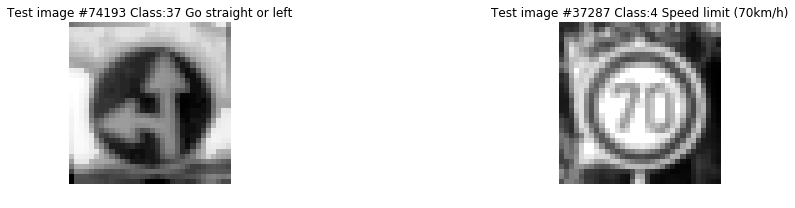

In [102]:
testIndex1 = np.random.randint(len(X_train))
testImage1 = X_train[testIndex1]
classId1 = y_train[testIndex1]
testIndex2 = np.random.randint(len(X_train))
testImage2 = X_train[testIndex2]
classId2 = y_train[testIndex2]
plt.figure(figsize=(15,3))
plt.subplot(121)
plt.title("Test image #{} Class:{} {}".format(testIndex1, classId1, signnames.SignName[classId1]))
plt.axis('off')
plt.imshow(testImage1.squeeze(), cmap='gray')
plt.subplot(122)
plt.title("Test image #{} Class:{} {}".format(testIndex2, classId2, signnames.SignName[classId2]))
plt.axis('off')
plt.imshow(testImage2.squeeze(), cmap='gray')
plt.tight_layout()
plt.savefig('./images/visualization_source_images.png', bbox_inches='tight')

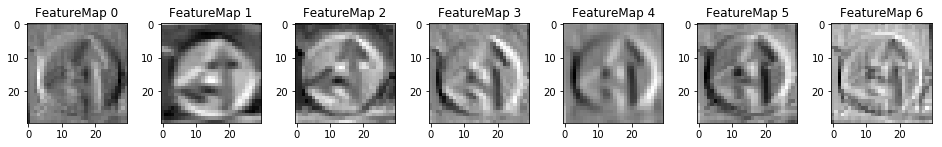

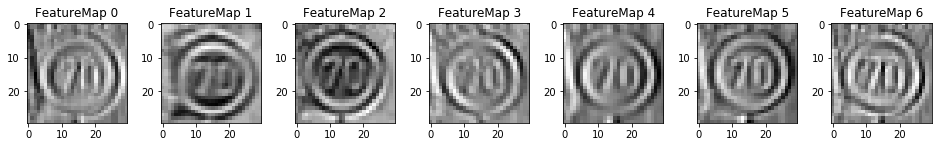

In [111]:
lyr = LAYERS.get('conv1')
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    sess.run(lyr, feed_dict={x: [testImage1, testImage2], keep_prob: 1.})
    outputFeatureMap(testImage1, lyr, plt_name='conv1_1')
    outputFeatureMap(testImage2, lyr, plt_name='conv1_2')

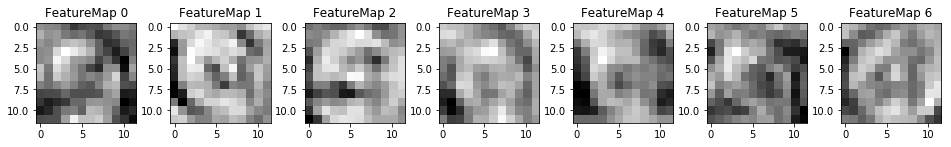

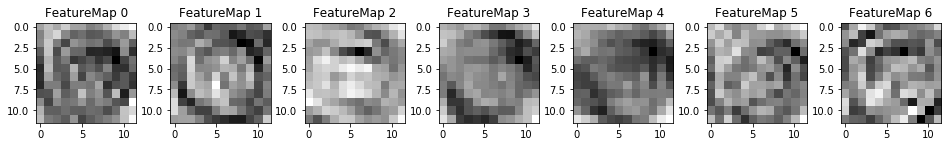

In [112]:
lyr = LAYERS.get('conv2')
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    sess.run(lyr, feed_dict={x: [testImage1, testImage2], keep_prob: 1.})
    outputFeatureMap(testImage1, lyr, plt_name='conv2_1')
    outputFeatureMap(testImage2, lyr, plt_name='conv2_1')

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**  


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [ ]:
from utils import show_graph

In [ ]:
show_graph(tf.get_default_graph().as_graph_def())

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 